# Problema 7.3

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

Sea el sistema de lazo de control de la figura adjunta:

![prob703.svg](./img/prob703.svg)

1. Dibujar el diagrama de bloques indicando la función de transferencia de cada subsitema. Suponer que el detector de nivel actua sin retraso alguno sobre el controlador

2. ¿Cuál es la función de transferencia para variaciones de carga ($H/Q_1$)?

3. Discutir la influencia de los parámetros de proceso y de los del controlador sobre la dinámica del sistema.

---

**Solución**

a) En primer lugar se realizará el balance macroscópico de materia al sistema, suponiendo que la densidad es constante e independiente del tiempo:

$$A \frac{\mathrm{d}h (t)}{\mathrm{d}t} = q_1 (t) - q_2 (t)$$

donde $A$ es el área del depósito. Acontinuación se encuentra el balance
en estado estacionario:

$$0 = q_{1, e} - q_{2, e}$$

donde el subíndice *e* indica que se trata de los valores en estado estacionario. Es decir, los valores de las variables anteriores a cualquier cambio. Habitualmente se trata de los valores de diseño de las variables.

Restando los dos balances se obtiene:

$$A \frac{\mathrm{d}H (t)}{\mathrm{d}t} = Q_1 (t) - Q_2 (t)$$

donde se han tomado las siguientes variables de desviación: 

$$\begin{aligned}
  H (t) &= h (t) - h_e \\
  Q_1 (t) &= q_1 (t) - q_{1, e} (t) \\
  Q_2 (t) &= q_2 (t) - q_{2, e} (t)
\end{aligned}$$

A continuación se realiza la transformada de Laplace:

$$\begin{aligned}
  \mathcal{L} \left( A \frac{\mathrm{d}H (t)}{\mathrm{d}t} \right) &=\mathcal{L} (Q_1 (t) - Q_2 (t)) \\
  As\bar{H} (s) &= \overline{Q_1} (s) - \overline{Q_2} (s)
\end{aligned}$$
  

Por tanto:

$$\bar{H} = \overline{Q_1}  \left( \frac{1}{As} \right) - \overline{Q_2} 
   \left( \frac{1}{As} \right)$$
   
A partir del modelo matemático obtenido se puede dibujar el diagrama de bloques del proceso:

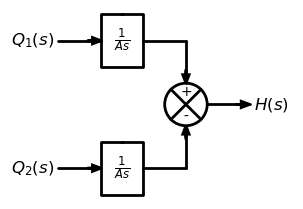

In [1]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=12)

d.add(dsp.Arrow().right().label(L"Q_1(s)", "left"))
proc1 = d.add(dsp.Box(h=1.25, w=1).label(L"\frac{1}{As}").anchor("W"))
d.add(dsp.Line().right().at(proc1.E))
d.add(dsp.Arrow().down())
suma = d.add(dsp.Mixer(W="+", E="-").anchor("W"))
d.push()
d.add(dsp.Arrow().down().at(suma.E).reverse())
d.add(dsp.Line().left())
proc2 = d.add(dsp.Box(h=1.25, w=1).label(L"\frac{1}{As}").anchor("E"))
d.add(dsp.Arrow().left().label(L"Q_2(s)", "left").at(proc2.W).reverse())
d.pop()
d.add(dsp.Arrow().right().at(suma.N).label(L"H(s)", "right"))

d.draw(show=false)

El diagrama de bloques del controlador es:

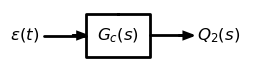

In [2]:
d = schemdraw.Drawing(unit=1, fontsize=12)

d.add(dsp.Arrow().right().label(L"\epsilon(t)", "left"))
proc1 = d.add(dsp.Box(h=1, w=1.5).label(L"G_c(s)").anchor("W"))
d.add(dsp.Arrow().right().label(L"Q_2(s)", "right").at(proc1.E))

d.draw(show=false)

donde la función de transferencia del controlador es:

$$G_c (s) = K_c  \left( 1 + \frac{1}{\tau_I s} \right)$$

Suponiendo que la función de transferencia del medidor de nivel y de la válvula sean iguales a la unidad, es decir, que su dinámica sea instantánea se obtiene el siguiente diagrama de bloques del conjunto controlador-proceso:

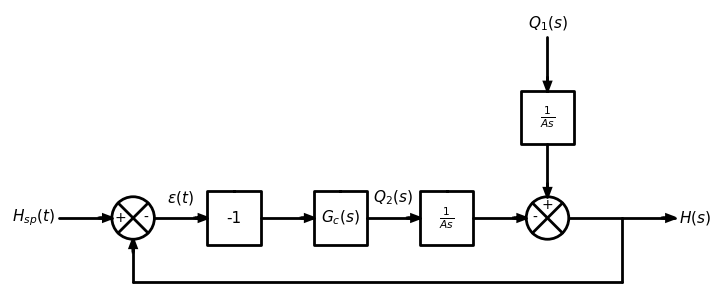

In [3]:
d = schemdraw.Drawing(unit=1.25, fontsize=11)

d.add(dsp.Arrow().right().label(L"H_{sp}(t)", "left"))
error = d.add(dsp.Mixer(W="+", E="-").anchor("W"))
d.add(dsp.Arrow().right().at(error.E).label(L"\epsilon(t)"))
menos1 = d.add(dsp.Box(w=1.25, h=1.25).anchor("W").label("-1"))
d.add(dsp.Arrow().right().at(menos1.E))
control = d.add(dsp.Box(w=1.25, h=1.25).anchor("W").label(L"G_c(s)"))
d.add(dsp.Arrow().right().at(control.E).label(L"Q_2(s)"))
proc1 = d.add(dsp.Box(w=1.25, h=1.25).anchor("W").label(L"\frac{1}{As}"))
d.add(dsp.Arrow().right().at(proc1.E))
suma = d.add(dsp.Mixer(W="-", N="+").anchor("W"))
d.push()
d.add(dsp.Arrow().up().reverse().at(suma.N))
proc2 = d.add(dsp.Box(w=1.25, h=1.25).anchor("S").label(L"\frac{1}{As}"))
d.add(dsp.Arrow().at(proc2.N).up().reverse().label(L"Q_1(s)", "right"))
d.pop()
d.add(dsp.Line().right().at(suma.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().label(L"H(s)", "right"))
d.pop()
d.add(dsp.Line().down().length(1.5))
d.add(dsp.Line().left().tox(error.S))
d.add(dsp.Arrow().up().to(error.S))

d.draw(show=false)

Es importante destacar el bloque -1 existente entre el comparador y el controlador. En el caso de que este bloque no se incluyese el sistema sería inestable (si se utiliza una válvula de acción directa) ya que el número de cambios de signo en el interior del bucle sería par.

b) La función de transferencia será:

$$\frac{\bar{H}}{\overline{Q_1}} = \frac{\frac{1}{As}}{1 + K_c  \left( 1 +
   \frac{1}{\tau_I s} \right)  \frac{1}{As}} = \frac{\frac{\tau_I}{K_c}
   s}{\frac{A \tau_I}{K_c} s^2 + \tau_I s + 1}$$
   
c) Al tratarse, la función de transferencia global, de un sistema de segundo orden, los parámetros que van a definir el comportamiento dinámico del lazo de control son la constante de tiempo y el coeficiente de amortiguamiento:

$$\begin{aligned}
  \tau &= \sqrt[]{\frac{A \tau_I}{K_c}}\\
  \zeta &= \frac{1}{2}  \sqrt[]{\frac{K_c \tau_I}{A}}
\end{aligned}$$

Se pueden considerar tres casos:

-   Aumena la constante de tiempo integral: En este caso aumenta el
    coeficiente de amortiguamiento y la constante de tiempo, lo que hace
    que la respuesta sea más lenta y amortiguada

-   Aumenta la ganancia proporcional del controlador: En ese caso
    disminuye la constante de tiempo y aumenta el coeficiente de
    amortiguamiento, la respuesta debería ser más rápida y amortiguada

-   Aumenta el área del depósito: Aumenta la constante de tiempo, pero
    disminuye el coeficiente de amortiguamiento